# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [236]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [237]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [238]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 210, 438]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,18567,1895,1393,1801,244,2100
2,10290,1981,2232,1038,168,2125


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Frozen: 3071.93
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
* **Sample 0** has -- (12669/12000.29, 	9656/5796.2, 	7561/3071.9, 	214/3071.93, 	2674/2881.4, 	1338/1524.8)
    - Fresh            -- above mean
    - Milk             -- very much above mean
    - Grocery          -- very much above mean
    - Frozen           -- very much below mean
    - Detergents_paper -- below mean
    - Delicatessen     -- below mean
    
- Analysis 
    - This is a customer who buys above average amount of multiple items. 
    - It could also be a **cafe or resturaent** that serves foods since they buy a bulk of ingredients to make food and clean things but not the frozen items. 
        - They may be serving popular food items and carry delis in small amounts and stock foods that are sold infrequently as fozen foods. 
    - This could also be a **shop** selling all products with a small freezer for icecreams
    
* **Sample 1** has -- (18567/12000.29, 	1895/5796.2, 	1393/3071.9, 	1801/3071.93,  	244/2881.4, 	2100/1524.8)
    - Fresh            -- very much above mean
    - Milk             -- very much below mean
    - Grocery          -- below mean
    - Frozen           -- below mean
    - Detergents_paper -- very much below mean
    - Delicatessen     -- above mean
    
- Analysis
    - This is a customer who buys above average amount of Fresh, Milk and Delicatessen and less amount of Grocery and Frozen with very less Detergents_paper
    - This could be a **shop** selling mainly Freshfood, Milk and Delicatessens with Groceries and Frozen as secondary items. 
    - It couldn't be a cafe or resturaent which sells prepared food products since there is very less cleaning supplies(Detergents_paper) bought compared to the mean.
   
* **Sample 2** has -- (10290/12000.29, 	1981/5796.2, 	2232/3071.9,  	1038/3071.93, 	168/2881.4, 	2125/1524.8)
    - Fresh            -- near mean 
    - Milk             -- below mean
    - Grocery          -- below mean
    - Frozen           -- below mean
    - Detergents_paper -- very much below mean
    - Delicatessen     -- above mean
    
- Analysis
    - This is a customer who buys more amount of Delicatessen and Fresh foods and moderate amount of other items except Detergents_paper
    - This could also be a **shop** selling mainly Delicatessen and Fresh foods with other items as secondary
  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [239]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
drop_feature = 'Grocery'
new_data = pd.DataFrame(data.drop(drop_feature, axis=1))
target = pd.Series(data[drop_feature])
#print target

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=5)
#print X_train.shape, X_test.shape, y_train.shape, y_test.shape

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

# verification
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(regressor, new_data, target, cv=5)
#print scores
#print np.mean(scores)

0.744499964581


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* I attempted to predict Grocery by dropping it and trying to predict it using the other features. I thought it will be positively correlated with Milk. I assumed a household, store, caffe or other business will buy Groceries in proportion to the amount of Milk they consume since they have similar shelf life and consuming property. Many beverages are prepared with Milk and Grocery items like sugar, coffee powder etc. Many snacks that are prepared using Groceries are usually served with some drink so, assumed there will be a positive correlation.

* The prediction score was around 0.744 which is greater than 0.5. It is an above average score since it is near the 0.80 mark. I verified it using a 5 fold cross validation and the average score was around 0.60 so, the sample score of 0.744 may not be true across all the data and there may be only a weak correlation overall.

* Yes the feature is necessary. We could see some amount of correlation between Grocery and other features which is evident from the scores (~0.60), but it is not very strong to leave this feature. It does well on some sub set of data and worse on another subset. There must be some latent variables and it could be found by using this feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/tutysara/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


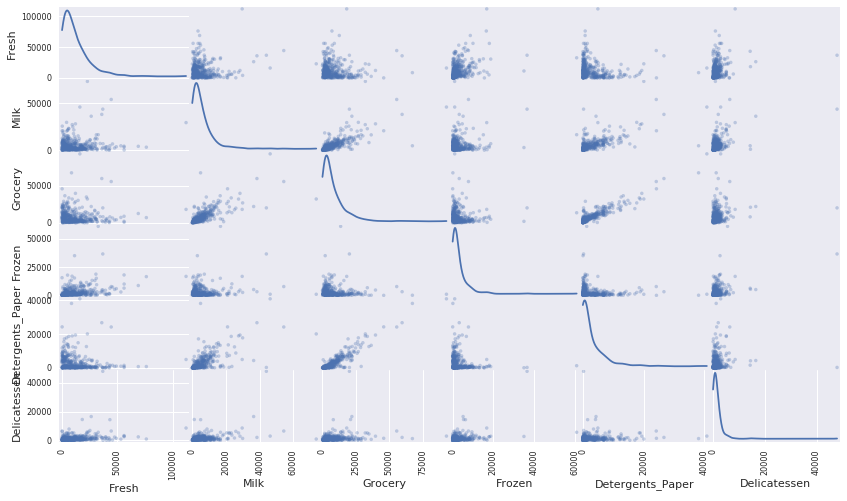

In [240]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

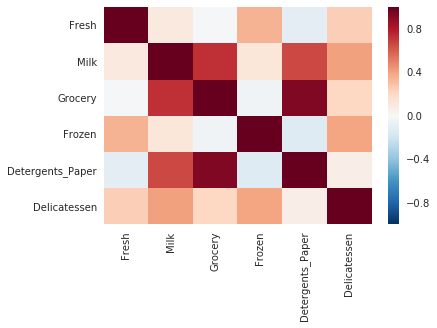

In [241]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

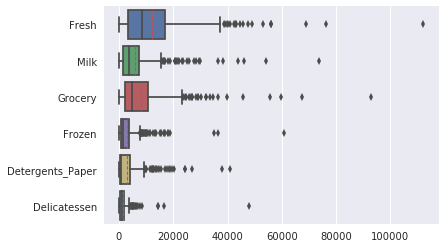

In [242]:
sns.boxplot(data, orient="h", showmeans=True, meanline=True)

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

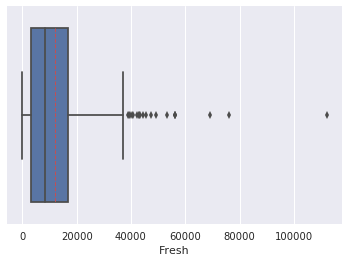

In [243]:
sns.boxplot(data['Fresh'], orient="h", showmeans=True, meanline=True)
data['Fresh'].describe()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
* We see that the median is left of mean. We have many values near zero and there are many outliers which lie beyond 1.5* IQR above the third quartile.  The data is skewed to the left with many huge outliers that pulls the mean to the right of median.

* We see there is a good correlation between Grocery and Detergents_Paper. We also have a weak correlation between Grocery and Milk and Detergents_Paper and Milk.

* Yes, this confirms the assumption that Grocery is correlated with Milk, but it is more surprising to see a strong correlation between Grocery and Detergents_Paper. I guess this is because many establishment who sell food need cleaning supplies proportianal to the amount of food they serve. Small foods like snacks and coffee requires more  groceries to prepare and they should be also served with more amount of papers like cups, napkins, covers etc.

* We see all the data is distributed with a heavy skew towards the left which can be seen from the scatter matrix. We can also see that there is a correlation with a positive slope between Grocery and Detergents_Paper and a spreadout(noisy) positive slope between Milk and Grocery and Milk and Detergents_Paper in the scatter matrix. None of the features are normally distributed and they are all skewed to left.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/tutysara/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


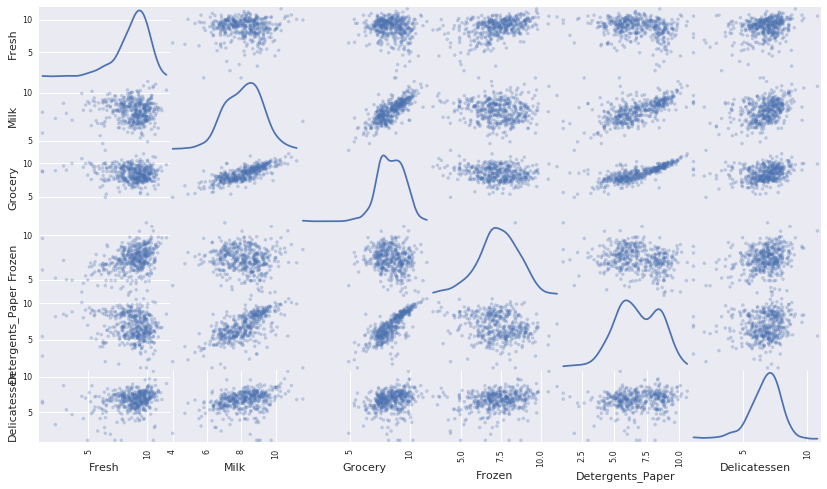

In [244]:
# TODO: Scale the data using the natural logarithm
log_data = pd.DataFrame(data).applymap(np.log)


# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(samples).applymap(np.log)
#print log_samples
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [245]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.829141,7.546974,7.239215,7.496097,5.497168,7.649693
2,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [246]:
log_samples.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,9.504994,8.104555,7.960209,6.602375,6.170821,7.503384
std,0.299363,0.927588,0.872948,1.105633,1.501644,0.263730
min,9.238928,7.546974,7.239215,5.365976,5.123964,7.198931
25%,9.342921,7.569166,7.474934,6.155514,5.310566,7.424312
50%,9.446913,7.591357,7.710653,6.945051,5.497168,7.649693
75%,9.638027,8.383346,8.320706,7.220574,6.694249,7.655610
max,9.829141,9.175335,8.930759,7.496097,7.891331,7.661527


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [302]:
# automatic removal of outliers which lie at a distance beyond 1.5*IQR of 1st Quartile and 3rd Quartile 
# For each feature find the data points with extreme high or low values
outlier_ary = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 50)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier=(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    print outlier.index.values
    outlier_ary.append(outlier.index.values)

Data points considered outliers for the feature 'Fresh':
[ 29  35  39  43  47  52  53  65  66  81  87  95  96  97  98 103 125 128
 129 154 159 170 171 173 174 176 181 182 184 193 203 218 239 258 259 266
 272 275 282 284 285 289 299 304 305 327 338 340 342 352 353 355 357 370
 377 392 412 418 436]
Data points considered outliers for the feature 'Milk':
[ 23  28  38  45  46  47  49  56  61  65  85  86  92  97  98 109 122 141
 154 163 171 181 183 191 200 201 211 216 219 247 251 254 265 269 289 301
 309 315 319 325 331 338 349 356 358 369 384 427 437]
Data points considered outliers for the feature 'Grocery':
[  9  23  28  38  43  45  46  47  49  56  61  63  65  71  75  77  85  86
  92  97 101 109 111 122 131 145 148 154 155 161 163 165 171 173 181 183
 193 200 201 205 209 211 216 228 237 238 247 251 253 266 268 275 289 301
 304 306 312 319 331 333 343 349 351 353 356 357 367 398 407 418 430 435
 437]
Data points considered outliers for the feature 'Frozen':
[  0   3  16  22  23  25  33  3

In [301]:
from functools import reduce
# get all data points having extreme values
outliers_union = reduce(np.union1d, outlier_ary)
print "Total number of outliers", len(outliers_union)

# check if some points considered outlier for more than one feature
import itertools
for i in range(2, 6+1):
    res = []
    for combination in itertools.combinations(outlier_ary, i):
        res_t = reduce(np.intersect1d, combination)
        if len(res_t) > 0:
            res = res + res_t.tolist()
            #print type(res_t.values())
    print "outliers in ", i, " feature are ", set(res)

# check if one of the sample point is an outlier that is to be removed
outliers = outliers_union
print np.intersect1d(outliers, indices)

Total number of outliers 250
outliers in  2  feature are  set([9, 22, 23, 25, 28, 38, 39, 40, 42, 43, 45, 46, 47, 49, 53, 56, 57, 61, 63, 65, 66, 71, 75, 77, 81, 85, 86, 87, 88, 92, 94, 96, 97, 98, 101, 103, 106, 109, 111, 122, 125, 128, 142, 145, 154, 155, 159, 161, 163, 165, 166, 170, 171, 173, 176, 181, 182, 183, 184, 187, 190, 191, 193, 200, 201, 202, 203, 205, 209, 211, 216, 218, 228, 237, 239, 245, 247, 251, 254, 258, 264, 265, 266, 268, 270, 275, 282, 284, 285, 289, 301, 303, 304, 306, 309, 312, 319, 325, 331, 333, 338, 340, 343, 349, 351, 353, 355, 356, 357, 358, 369, 376, 384, 398, 402, 407, 412, 418, 420, 427, 435, 436, 437, 439])
outliers in  3  feature are  set([128, 171, 193, 265, 266, 343, 45, 145, 23, 154, 155, 412, 237, 289, 418, 163, 38, 28, 301, 43, 173, 46, 47, 304, 49, 181, 183, 184, 191, 61, 319, 65, 66, 71, 325, 353, 200, 201, 331, 333, 56, 338, 211, 85, 86, 87, 216, 218, 92, 349, 97, 356, 357, 358, 109, 437, 247, 122, 251, 42])
outliers in  4  feature are  set([1

In [303]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 50)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 3 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [289, 357, 65, 171, 47, 181, 154, 251]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
353,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
357,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
333,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
93,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
103,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
125,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
181,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
333,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
71,9.814164,7.143618,9.954276,8.589142,8.336390,9.579971
87,10.675099,8.522181,9.001716,8.750208,7.364547,9.571575
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
* We have many data points that are outliers by the above definition of 1.5xIQR below Q1 or above Q3. There are some data point which contain extreme values for more than one feature. There are around 20 points which are outliers in 4 features and 8 points which are outliers in 5 features and 3 if we consider all 6 features
* The points which are considered outlier in more than 3 or 4 features can be removed since they are extreme values that pulls the mean and doesn't add much data to differentiate one point from another based on the values of the features. The points which have variations in fewer dimensions can be retained because they may represent specialized segments concentrating on one part of business more than the other. They may add some data and mostly lie in the boundary that separates one cluster from another.
* All data points that are considered as outlier in atleast 5 features are added to outlier list since they are large establishments by volume. They don't have much variation in terms of relative difference in the consumption of various features. They pull the mean up in their direction and don't add much information to clustering. They may skew the cluster shape in their direction. They are outliers and doesn't represent the general population well.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

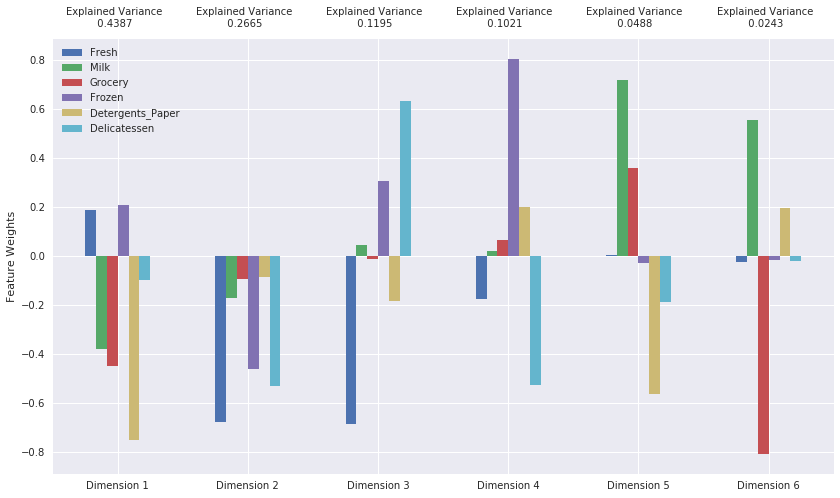

In [304]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* First and Second Principal components together captures 72.06% of the variance in data
* First four principle components explains 93.92% of variance in data
* Dimensions and their cumulative variance
  - This question was not very clear, after reading through the discussions in forums got to know few things and here are the assumptions(observations) made
      1. Direction of features in a dimension doesn't siginify anything only magnitude matters. T
      2. sign of a feature doesn't signify anything but relative direction has a value. Example coffeshops buying milk, grocery and detergent_papers will have all of them in one direction and the other three in opposite direction. A juice shop will have fresh, grocery and detergent_papers in one direction and the others in opposite direction.
      
      
  - The first dimension captures ~ 50% of the variance in data. 
      - It best represents Detergent_Paper, Grocery and Milk in one direction and Fresh and Frozen items in another. 
        Detergent_Paper has more impact followed by Grocery and Milk.
      - Since Detergent_Paper is having most impact in this dimension, it captures customers who buys relatively more amount of Detergent_Paper than mean along with more amount of Grocery and Milk and not much of Fresh and Frozen items. It can be the vice versa as well, since the direction doesn't matter we can't tell if the direction represents more or less value. We only know about the rate of change or relative importance of each feature.
      
      
  - The second dimension captures ~ 25% of the variance in data
      - It captures the variation of all the features. It can be seen that all features are in the same direction with Fresh, Frozen and Delicatessen having more influence. With Detergent_Paper having the lowest influence and Milk and Grocery having moderate influence.
      - This captures the information where increased spending in Fresh represents a increased spending in Frozen and Delicatessen as well, with moderate increase in Milk, Grocery and Detergent_Paper. It may also be the opposite case where spending less on Fresh, Frozen and Delicatessen results in moderate reduction in the spending on other three items. This captures the general trend on how the rate of spending in one feature results in the spending in other features.
      
      
  - The third dimension captures ~ 11% of the variance in data
      - It captures the variation in Fresh, Detergent_Paper and Grocery in one direction vs the variation in Delicatessen, Frozen and Milk in the other direction. Fresh domiates one direction while Delicatessen dominates the other direction.
      - This captures the trend in data on how spending on Fresh decreases the spending on Delicatessen and Frozen items and the viceversa. This represents a common observation where customers who spends a lot on Frozen items, Milk and Deli may get a small amout of Fresh items. This is a customer who likes meats and rich food and consumes less of veggies and fresh produce or the viceversa.
      
      
  - The fourth dimension captures ~ 9% of the variance in data
      - It captures the dominant variation in Frozen vs Delicatessen. With moderate variation in Milk, Grocery and Detergent_Paper going along with Frozen and Fresh going along with Delicatessen.
      - This represents the opposite direction in the relation between Frozen items and Delicatessen(Fresh Meat and milk products). Delicatessen are perishables and customers who is having a fast moving business get fresh delis as opposed to frozen items. Many restaurants also prefer to cook fresh food using deli as ingredient instead of using frozen items. The opposite is also true where an establilshment buys lots of Frozen items and just heat and serve them instead of cooking using delis.
  

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [305]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8021,-0.1845,-0.9050,-1.6895,0.2748,0.4033
1,1.8502,-1.0186,0.1611,-0.9014,-0.3051,0.3517
2,1.6740,-0.3909,0.4685,-1.2894,0.1192,-0.0552


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [254]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [255]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7476,0.1039
1,1.8122,-0.9001
2,1.6608,-0.2663


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

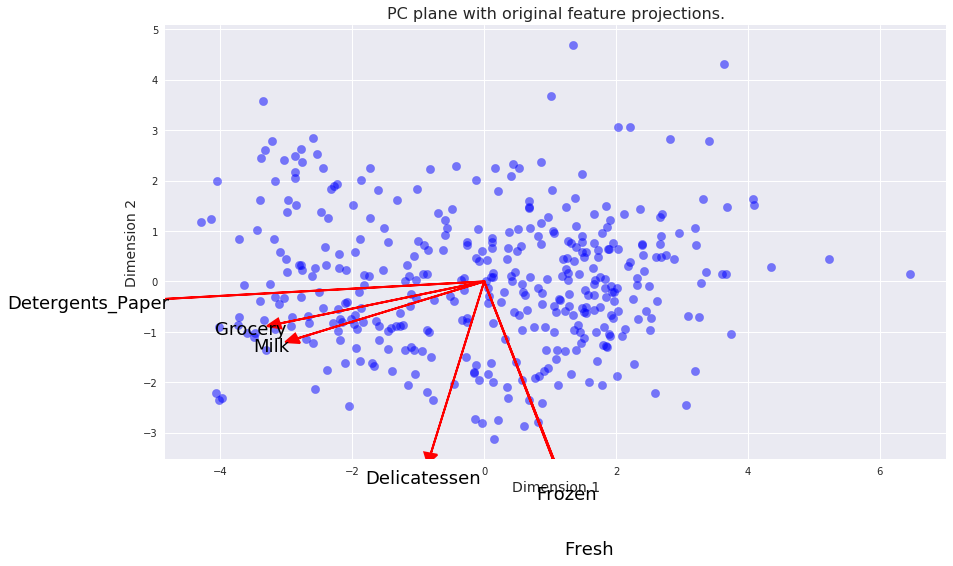

In [256]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
* K-Means is a hard assignment clustering algorithm, the main advantages are
    - It is a simple algorithm and easy to understand
    - It is compuatationally faster than GMM clustering which can have overlaps
    - When the clusters doesn't overlap it produces the best result
* Gaussian Mixture Model is a soft assignment clustering algorithm where the membership to each cluster is a probablity, the advantages are
    - It performs well in data where the clusters overlap
    - It doesn't have bias to certain shapes. It performs well even on eliptical clusters, whereas K-Means assumes the data to be spherical
* Gaussian Mixture Model is best suited to our problem of wholesale customer data. There could be overlaps between clusters since certain establishment may fall into more than one clusters based on how the data is clustered. There are many outliers for each features and they don't cluster around a mean value to form a spherical shape so, GMM which doesn't assume a spherical shape will do well for our data

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [257]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
for n_components in range(2, 3):
    clusterer = GaussianMixture(n_components=n_components)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print n_components, score

2 0.452530710888


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
* The silhouette scores are calculated for cluster size from 2 to 5 to get the optimum value of the cluster size, the values are

| S.NO | cluster size | Score          
|------|--------------|----------------|
| 1    | 2            | 0.452353727967 |  
| 2    | 3            | 0.341526878902 |
| 3    | 4            | 0.31937576857  |
| 4    | 5            | 0.318617951258 |

* We see that the cluster size of 2 has the best silhouette score. This is the same number of dimensions we have in the input data set.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

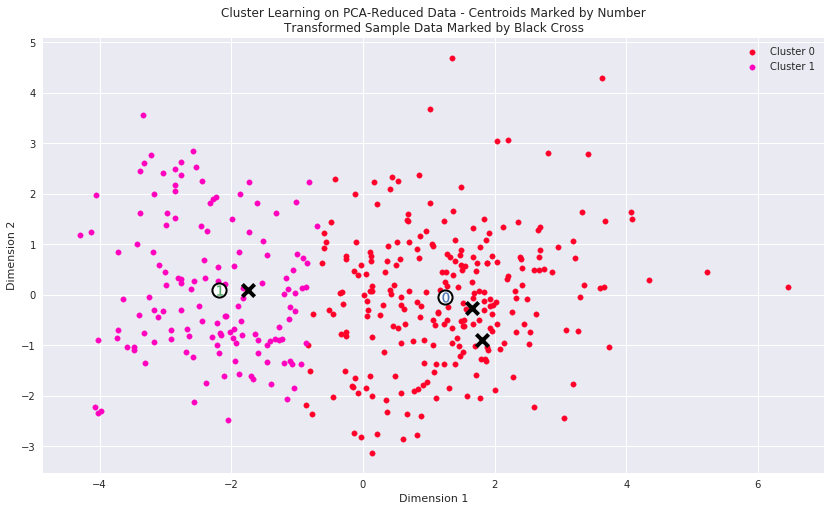

In [258]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [259]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9054.0,2002.0,2568.0,1927.0,348.0,742.0
Segment 1,4157.0,7827.0,11528.0,1047.0,4533.0,1028.0


In [309]:
desc = data.describe()
desc.loc['mean']

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
Name: mean, dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
* Segment 0 is compared to the mean values like
    ```
    Fresh               9054/12000.29 below avg
    Milk                 2002/5796.26 below avg
    Grocery              2568/7951.27 below avg
    Frozen               1927/3071.93 below avg
    Detergents_Paper      348/2881.49 low below avg
    Delicatessen          742/1524.87 low below avg
    ```
    - This segment makes a below average purchase of all the items. He buys Fresh, Milk, Grocery and Frozen in moderate amount and Detergents_Paper and Delicatessen in small amounts.
    - This segment is similar to sample 1 and sample 2 since they both lie in this segment.
    - The main differentiator between this and segment 1 is the relatively less purchase of Detergents_Paper, Grocery and Milk
    - This is a customer who may be an end user of the purchased materials as opposed to segment1 where we have very large amount of purchse of Detergents_Paper and Grocery. Those high purchse may indicate a retail establishment who buys and sells things. This segment is mostly a **non retail** establishment.
   
* Segment 1 is compared to the mean values like
    ```
    Fresh               4157/12000.29 below avg
    Milk                 7827/5796.26 above avg
    Grocery             11528/7951.27 very above avg
    Frozen               1047/3071.93 below avg
    Detergents_Paper     4533/2881.49 very above avg
    Delicatessen         1028/1524.87 below avg
    ```
    - This customer makes an above average purchase of Milk, Grocery and Detergents_Paper. They also buy a little bit of Fresh food, Frozen and Delicatessen.
    - The relatively high values of all items may indicate a retail establishment that buys things in bulk and sells them in retail.
    - The high value of Detergents_Paper and Grocery with a moderate and low value for Fresh, Milk, Frozen and Delicatessen solidies our assumption that this is a segment that sells the purchase than making use of it. If they are using the purchases to make a food product which is being sold, then the need for Fresh, Milk will be more than or alteast proportional to amount of Detergents_Paper and Grocery.
    - This is similar to Sample 0 we selected before. I concluded Sample 0 to be a caffee or Restaurant because of the high purchase of Detergents_Paper. I assumed an eatery might need more Detergents_Paper, but on further examination and looking at the clusters in bi-polar plot with projection of Fresh feature I am getting more and more convinced that Detergents_Paper may not be need in large quantities in eatries where Fresh and Delicatessen feature are consumed less. It is seen that Detergents_Paper projection is almost perpendicular to Fresh and Delicatessen, which indicates that they are not related to each other. An establishment getting more amout of Fresh and Delicatessen could be an eatery. More amount of Fresh and Delicatessen will not result in more amount of Detergents_Paper, which makes equating establishment with more amount Detergents_Paper to an eatery is not correct. The opposite is true, where an establishment buying large quantities of Detergents_Paper may not be an eatery. This segment is most likely a **retail** establishment.
   

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [261]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
Cluster 0 is a most likely an eatery customer and Cluster 1 is a retail customer by the analysis in question 8.
* From what is seen from data
    1. Sample 0 -- this looks very similar to segment 1's center where there is a high purchase of Detergents_Paper and comparitively less amount of Fresh and Deli. So, this belong to segment 1's cluster. This is a retail customer as per the result in question 8.
    2. Sample 1 -- this is similar to segment 0's center, with moderate values in all features and low value in Detergents_Paper. This could be a non retail customer, some form of an eatery.
    3. Sample 2 -- this is similar to Sample 1. But there is comparitively less purchase of Fresh and more purchase of Grocery than sample 1, which makes it a bit different and moves it closer to segment1. But we see a very small purchase of Detergents_Paper which is a strong indicator of non retail customer. So, this clould be more likely an eatery similar to sample 1.

  
* Yes the prediction of sample points are consistent with the assumptions. Sample1 and Sample 2 are grouped together as assumed. They are put inside cluster 0 which represent a non retail establilshment. This is per assumption as well. Sample 0 is put in a different cluster to sample 1 and sample 2, it is put in cluster 1 which represents a retail customer.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
* We have two clusters with cluster 0 representing eateries and cluster 1 representing big retail customers who buy products in bulk. My assumption is that big retail customers who are in cluster 1 will respond positively with the change to 3 day delivery.

Here are few reasons big retail customers may like a 3 day delivery schedule
1. Taking care of delivery, stocking and arranging things is one more work to do in a big establishment and they don't like to do it often
2. They usually have storage facility to keep stock of things and also plan their needs in advance. A 3 day delivery schedule allows them to plan things better.
3. They usually buy in bulk and infrequently so that accounting is easier as opposed to many small bills. They also make use of bulk discounts.
4. Finally many big customers may already have a weekly or biweekly delivery cycle and the change may not affect them much.

and small non retail customers may not react positively because
1. Small non retail customers on the other hand can't plan well and might have adhoc demands.
2. They buy in small quantities but frequently.
3. They buy lot of fresh foods and delis which are good when bought fresh in small quantities frequently
4. Eateries may be more sensitive to price and delivery times since they have high competition and push every bit to improve quality and decrease cost. Extra storage requirement and infrequent delivery may adversely affect them.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* We have existing customer data along with the customer segment feature, which is an engineered feature that is added to each data point based on which cluster they belong to. 
* When we get a new customers and their data, we could run a supervised classification algorithm like k-means classifier with customer segment as target variable to predict the customer segment of new customers. The algorithm can be trained on the original data with the new customer segment engineered feature as target. This can be used to recommend appropriate delivery service for new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

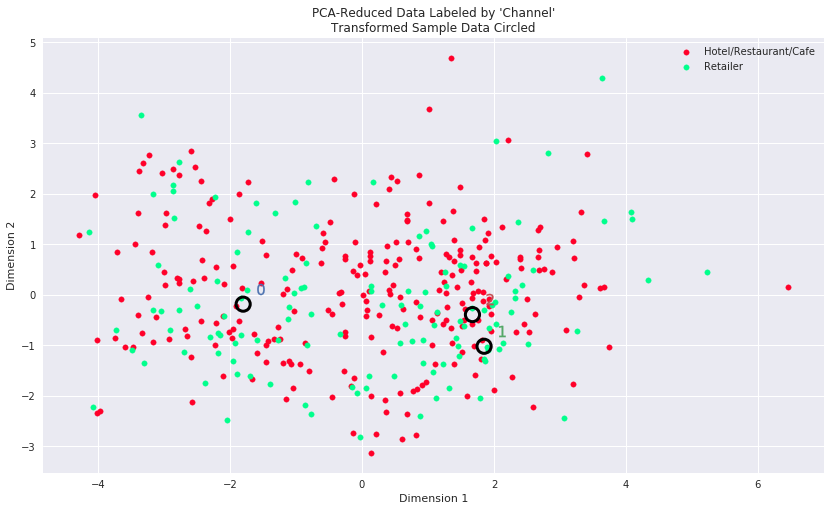

In [308]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
* We got a Silhouettes score of 0.452530710888 when we partitioned the data into two clusters. This is the highest sore we got. It is not near 1 which is the best score we can get for tight clusters which are spaced apart.  Since it is near zero we know that the clusters are overlapping. From the plot we can see that there are two spread out clusters representing Hotel/Restaurant/Cafe and Retail customers. We can see that there is a considerable overlapping between the two clusters and they are spread out and not tightly clustered. It agrees with the result we got by splitting the data into two clusters.
* The clusters are spread out and there is a lot of overlap between them. We have very small area in the left side of the graph(Dimension 1 < -3) that can be purely classified as Retailers and some in the right side of the graph ( Dimension1 >2) that can be purely classified as Hotel/Restaurant/Cafe. We can see that this separation is possible mostly in Dimension1 where Detergents_Paper, Milk and Grocery are the deciding features.	
* Yes, this is consistent with the previous classification of customer segments. We know that there is a Retail section and an eatery section from previous analysis. The result with Retailers and Hotels/Restaurants/Cafes labels with the inclusion of Channel feature matches our labelling. The left cluster is labelled as Retailers and the right cluster as Hotels/Restaurants/Cafes which is consistent with our definition.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.